In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

data = [[np.random.randn()**2,np.random.choice(['A','A','B']), np.random.randint(0,3)] for i in range(10)] \
        + [[np.random.randn()-1,np.random.choice(['A','B','C']), np.random.randint(2,5)] for i in range(10)] \
        + [[np.random.randn()-1,np.random.choice(['A','C','C','C']), np.random.randint(2,4)+np.random.randint(0,2)+np.random.randint(0,1)] for i in range(10)]
df = pd.DataFrame(data, columns=['float','letter','int'])
df

,float,letter,int
0,3.560026,A,0
1,0.466364,B,0
2,1.803588,A,2
3,0.862181,B,1
4,1.496160,B,2
5,1.114472,A,2
6,0.156572,A,0
7,3.618151,B,1
8,0.108160,A,0
9,0.498985,B,1


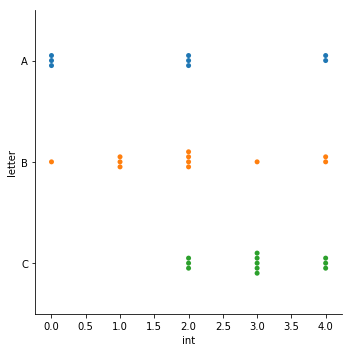

In [2]:
sns.catplot(x="int", y="letter", kind="swarm", data=df)

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


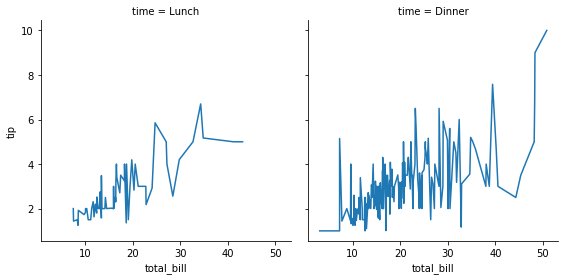

In [4]:
sns.relplot(x="total_bill", y="tip", col="time", height=4, kind="line", estimator=None, data=tips)

In [5]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['a0', 'a1', 'a2', 'a3'],
                    'B': ['b0', 'b1', 'b2', 'b3'],
                    'C': ['c0', 'c1', 'c2', 'c3'],
                    'D': ['d0', 'd1', 'd2', 'd3']},
                    index=[0, 1, 2, 3])
df3 = pd.concat([df1,df2], join='inner')
df3

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [6]:
df3.iloc[1]

A    A1
B    B1
C    C1
D    D1
Name: 1, dtype: object

In [23]:
x = df3.loc[:,'A'].values

'A0'

In [24]:
x = np.array([1,2,4,5,6])
x = x/np.linalg.norm(x)
x

array([0.11043153, 0.22086305, 0.4417261 , 0.55215763, 0.66258916])

In [29]:
df4 = pd.DataFrame([[1,2,3],[2,3,4],[4,5,6]],index=[0,1,2],columns=['A','B','C'])
y = df4.values
y[0]

array([1, 2, 3], dtype=int64)

In [36]:
def convertFrame(data, attr, scaleLabel=False, normAsAttribute=False):
    vectors = data.drop(attr, axis=1).values
    labels = data.loc[:,attr].values
    if scaleLabel:
        if normAsAttribute:
            return [[np.append(vector/np.linalg.norm(vector), np.array(np.linalg.norm(vector))), label/np.linalg.norm(vector)] for vector, label in zip(vectors, labels)], data.columns.size-1
        else:
            return [[vector/np.linalg.norm(vector), label/np.linalg.norm(vector)] for vector, label in zip(vectors, labels)], data.columns.size-1
    else:
        if normAsAttribute:
            return [[np.append(vector/np.linalg.norm(vector), np.array(np.linalg.norm(vector))), label] for vector, label in zip(vectors, labels)], data.columns.size-1
        else:
            return [[vector/np.linalg.norm(vector), label] for vector, label in zip(vectors, labels)], data.columns.size-1
convertFrame(df4, 'C', scaleLabel=True)

([[array([0.4472136 , 0.89442719]), 1.3416407864998738],
  [array([0.5547002 , 0.83205029]), 1.1094003924504583],
  [array([0.62469505, 0.78086881]), 0.9370425713316364]],
 2)

In [28]:
df4.columns.size

3

In [31]:
np.append(y[0],np.array(44))

array([ 1,  2,  3, 44], dtype=int64)

(array([6., 9., 7., 7., 4., 5., 4., 5., 2., 1.]),
 array([-1.65402141, -1.2443964 , -0.83477139, -0.42514638, -0.01552137,
         0.39410363,  0.80372864,  1.21335365,  1.62297866,  2.03260367,
         2.44222868]),
 <a list of 10 Patch objects>)

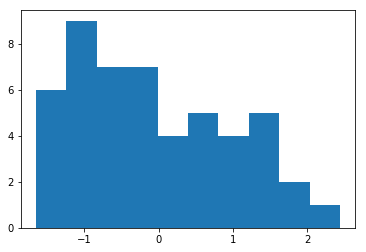

In [125]:
import matplotlib.pyplot as plt
from scipy.stats import norm
sample = norm.rvs(size=50)
x = plt.hist(sample)
x

In [136]:
# Returns a function that when applied on the underlying data of the histogram argument
#     will create an approximately uniform distribution.
# Assumes histogram is a pair of two arrays where the first one is count in each bin,
#     and the second is the bin boundaries.
# Also assumes bins are evenly spaced, and that there is at least one bin.
def generateUniformizingFunction(h):
    # Check array format
    assert len(h) == 2, "Not a valid histogram--should be composed of two arrays"
    assert len(h[0]) > 0 and len(h[1]) > 1, "Not a valid histogram--should be nonempty"
    assert len(h[0]) + 1 == len(h[1]), "Not a valid histogram--number of bins does not correspond to number of bin boundaries"
    
    hist = [item[:] for item in h]
    spacing = hist[1][1] - hist[1][0]
    cumSum = []
    cumSum.append(hist[1][0])
    for i in range(len(hist[1])-1):
        cumSum.append(cumSum[i] + hist[0][i] * spacing)
    def getIndex(val):
        for i in reversed(range(len(hist[0]))):
            if val >= hist[1][i]:
                return i
            return -1
    def function(val):
        i = getIndex(val)
        if i == -1:
            return val
        else:
            bucketStart = cumSum[i]
            return (val - hist[1][i]) * hist[0][i] + bucketStart
    return function


In [137]:
f = generateUniformizingFunction(x[:2])

In [138]:
y = [f(s) for s in sample]

In [141]:
f(-1)

-1

0.40962500986397843